# Requests

* Coding of formulas: What goes where and why?
* Small examples and quick coding exercises
* Coding problems in variance and regression
* Coding Lasso, Ridge, and Cross Validation
* Conceptually Bias and Variance
* Logistic regression, Naive Bayes, and Decision trees
* Weeks 3, 4, and 5 conceptually
    1. Bias-Variance, Cross Validation, CoD
    2. Regularization
    3. Logistic Regression
    4. Clustering
    5. Naive Bayes
    6. Evaluation Metrics
* Growth Plan and where to go from here
* Conceptual ideas behind each algorithm
* Python practice for growth in sklearn
* Coding from scratch or translating search topics in SKlearn into usable code
* Basics of Python
    1. Lists
    2. Dictionaries
* Interview questions. What types of questions elude candidates.
* Loading data that isn't in csv format
* Indexing pandas date frame
* Tips and tricks for working around null values
* How to use %debug
* Ridge and Lasso
* Real world example of using a decision tree
* Discuss how to choose a model. If it's continuous then use regression
* What are machine learning job interviews like? Build a model? Conceptual questions?


* Give examples of decision trees and logistic regression
* What is Hierarchical Clustering used for?

# Topics

* Growth Plan
* Jupyter, Numpy, Pandas Series and DataFrame, Dictionary
* Machine Learning Basics
    1. Supervised, Unsupervised
    2. Classification, Regression
    3. Clustering, dimensionality reduction
* What algorithms have we learned:
    1. Linear Regression
    2. Lasso
    3. Ridge
    4. KNN
    5. Naive Bayes
    6. Decision Trees
    7. Clustering
    8. Logistic Regression
* Parameters of each algorithm? How do we choose parameters?
* Coding formula SKLearn
    1. estimator
    2. SKLearn lookup
    3. Create Object
    4. Fit, Predict
    5. Parameters
    6. Input 
* Loading data
* Ridge, Lasso, and Cross Validation Coding
* Conceptually Bias and Variance
    1. What it means
    2. Each estimator
    3. What we see
    4. What we do
    5. Learning curves

* Interview Questions

* Hierarchical Clustering uses
* Null values
* %debug
* Real world uses of decision trees
* Core Python
* Conceptually
    1. Bias, Variance, CV, CoD
    2. Regularization
    3. Logistic Regression
    4. Clustering
    5. Naive Bayes
    6. Evaluation Metrics

In [15]:
import pandas as pd
import numpy as np

# Numpy and Pandas

* Load Iris Dataset. What type is this?
* Create a DataFrame from it
    1. pd.DataFrame.from_records(iris.data)
* Rename the columns
* What are the column names?
* Select the first column. What type is this? Check it.
* Convert it to a numpy array
* Select rows 1,2,3
* Select just the first two flower types. How'd you do this? What type is the data structure now

# Sparse Models

In [2]:
from sklearn.datasets import make_regression
reg_data, reg_target = make_regression(n_samples=2000, n_features=3, effective_rank=2, noise=10)

In [3]:
import numpy as np
from sklearn.linear_model import LinearRegression

n_bootstraps = 1000
len_data = len(reg_data)
subsample_size = np.int(0.75*len_data)
subsample = lambda: np.random.choice(np.arange(0, len_data), size=subsample_size)
coefs = np.ones((n_bootstraps, 3))

for i in range(n_bootstraps):
    subsample_idx = subsample()
    subsample_X = reg_data[subsample_idx]
    subsample_y = reg_target[subsample_idx]
    
    lr = LinearRegression()
    lr.fit(subsample_X, subsample_y)

    coefs[i][0] = lr.coef_[0]
    coefs[i][1] = lr.coef_[1]
    coefs[i][2] = lr.coef_[2]

In [4]:
from sklearn.linear_model import Ridge

n_bootstraps = 1000
len_data = len(reg_data)
subsample_size = np.int(0.75*len_data)
subsample = lambda: np.random.choice(np.arange(0, len_data), size=subsample_size)

coefs_r = np.ones((n_bootstraps, 3))


for i in range(n_bootstraps):
    subsample_idx = subsample()
    subsample_X = reg_data[subsample_idx]
    subsample_y = reg_target[subsample_idx]
    
    lr = Ridge()
    lr.fit(subsample_X, subsample_y)

    coefs_r[i][0] = lr.coef_[0]
    coefs_r[i][1] = lr.coef_[1]
    coefs_r[i][2] = lr.coef_[2]

(array([   4.,   43.,  127.,  230.,  250.,  194.,  104.,   37.,    9.,    2.]),
 array([  5.93975275,   8.89890624,  11.85805973,  14.81721321,
         17.7763667 ,  20.73552018,  23.69467367,  26.65382715,
         29.61298064,  32.57213412,  35.53128761]),
 <a list of 10 Patch objects>)

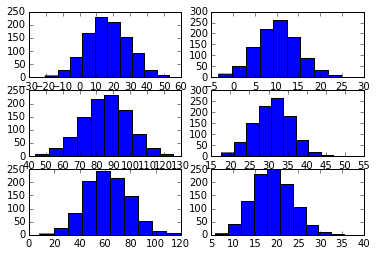

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplot(3,2,1)
plt.hist(coefs[:,0])

plt.subplot(3,2,3)
plt.hist(coefs[:,1])

plt.subplot(3,2,5)
plt.hist(coefs[:,2])

plt.subplot(3,2,2)
plt.hist(coefs_r[:,0])

plt.subplot(3,2,4)
plt.hist(coefs_r[:,1])

plt.subplot(3,2,6)
plt.hist(coefs_r[:,2])

### Redo with different alphas

In [6]:
from sklearn.linear_model import Ridge

n_bootstraps = 1000
len_data = len(reg_data)
subsample_size = np.int(0.75*len_data)
subsample = lambda: np.random.choice(np.arange(0, len_data), size=subsample_size)

coefs_r1 = np.ones((n_bootstraps, 3))


for i in range(n_bootstraps):
    subsample_idx = subsample()
    subsample_X = reg_data[subsample_idx]
    subsample_y = reg_target[subsample_idx]
    
    lr = Ridge(alpha=1e-10)
    lr.fit(subsample_X, subsample_y)

    coefs_r1[i][0] = lr.coef_[0]
    coefs_r1[i][1] = lr.coef_[1]
    coefs_r1[i][2] = lr.coef_[2]

In [7]:
from sklearn.linear_model import Ridge

n_bootstraps = 1000
len_data = len(reg_data)
subsample_size = np.int(0.75*len_data)
subsample = lambda: np.random.choice(np.arange(0, len_data), size=subsample_size)

coefs_r2 = np.ones((n_bootstraps, 3))


for i in range(n_bootstraps):
    subsample_idx = subsample()
    subsample_X = reg_data[subsample_idx]
    subsample_y = reg_target[subsample_idx]
    
    lr = Ridge(alpha=.9)
    lr.fit(subsample_X, subsample_y)

    coefs_r2[i][0] = lr.coef_[0]
    coefs_r2[i][1] = lr.coef_[1]
    coefs_r2[i][2] = lr.coef_[2]

(array([   6.,   29.,   80.,  177.,  225.,  222.,  154.,   75.,   23.,    9.]),
 array([  6.36181874,   9.1511394 ,  11.94046006,  14.72978072,
         17.51910139,  20.30842205,  23.09774271,  25.88706337,
         28.67638403,  31.46570469,  34.25502536]),
 <a list of 10 Patch objects>)

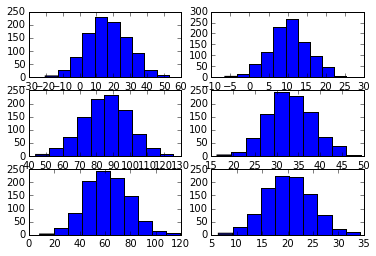

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.subplot(3,2,1)
plt.hist(coefs[:,0])

plt.subplot(3,2,3)
plt.hist(coefs[:,1])

plt.subplot(3,2,5)
plt.hist(coefs[:,2])

plt.subplot(3,2,2)
plt.hist(coefs_r2[:,0])

plt.subplot(3,2,4)
plt.hist(coefs_r2[:,1])

plt.subplot(3,2,6)
plt.hist(coefs_r2[:,2])

# Fit knn on the Iris data set with default parameters

# Fit KNN on the Iris data set using cross validation grid search to choose k. Try values of k 1 to 50. 

# Bias and Variance Learning and Validation Curves

In [12]:
# Validation Curve

import numpy as np
from sklearn.learning_curve import validation_curve
from sklearn.datasets import load_iris
from sklearn.linear_model import Ridge

np.random.seed(0)
iris = load_iris()
X, y = iris.data, iris.target
indices = np.arange(y.shape[0])
np.random.shuffle(indices)
X, y = X[indices], y[indices]

train_scores, valid_scores = validation_curve(Ridge(), X, y, "alpha",np.logspace(-7, 3, 3))

In [13]:
#Learning Curve
from sklearn.learning_curve import learning_curve
from sklearn.svm import SVC

train_sizes, train_scores, valid_scores = learning_curve(SVC(kernel='linear'), X, y, train_sizes=[50, 80, 110], cv=5)

In [14]:
train_scores

array([[ 0.98      ,  0.98      ,  0.98      ,  0.98      ,  0.98      ],
       [ 0.9875    ,  1.        ,  0.9875    ,  0.9875    ,  0.9875    ],
       [ 0.98181818,  1.        ,  0.98181818,  0.98181818,  0.99090909]])

# Logistic Regression

In [36]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=4)

In [37]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [38]:
X_train = X[:-200]
X_test = X[-200:]
y_train = y[:-200]
y_test = y[-200:]

In [40]:
lr.fit(X_train, y_train)
y_train_predictions = lr.predict(X_train)
y_test_predictions = lr.predict(X_test)

In [41]:
(y_train_predictions == y_train).sum().astype(float) / y_train.shape[0]

0.91249999999999998

In [42]:
(y_test_predictions == y_test).sum().astype(float) / y_test.shape[0]

0.93000000000000005